In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import *


In [30]:
data = load_breast_cancer()
data_df = pd.DataFrame(data=data.data, columns=data.feature_names)
data_df['target'] = data.target
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [31]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [32]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

In [33]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [36]:
theta = np.zeros(X_train.shape[1])

In [37]:
def cost_function(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    cost = np.mean(-y * np.log(h) - (1 - y) * np.log(1 - h))
    gradient = np.dot(X.T, (h - y)) / y.size
    return cost, gradient

def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        cost, gradient = cost_function(theta, X, y)
        theta -= learning_rate * gradient
        cost_history.append(cost)
    return theta, cost_history

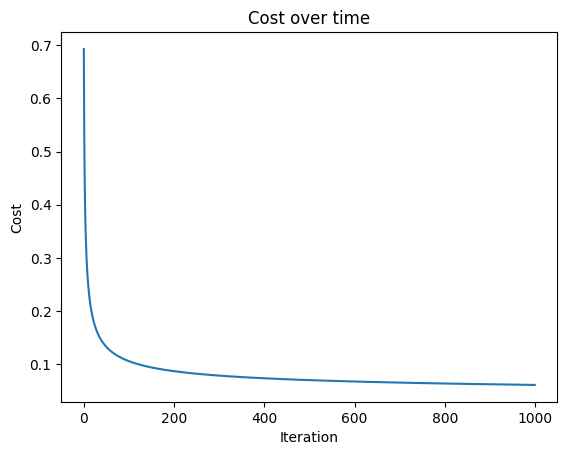

In [38]:
learning_rate = 0.1
iterations = 1000
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over time")
plt.show()

In [39]:
y_pred = sigmoid(np.dot(X_test, theta)) >= 0.5
conf_mat = confusion_matrix(y_test, y_pred).ravel()
tp = conf_mat[3]
fp = conf_mat[1]
tn = conf_mat[0]
fn = conf_mat[2]
print("True positives:", tp)
print("False positives:", fp)
print("True negatives:", tn)
print("False negatives:", fn)

True positives: 70
False positives: 1
True negatives: 42
False negatives: 1
